# EDA on video game sales and ratings

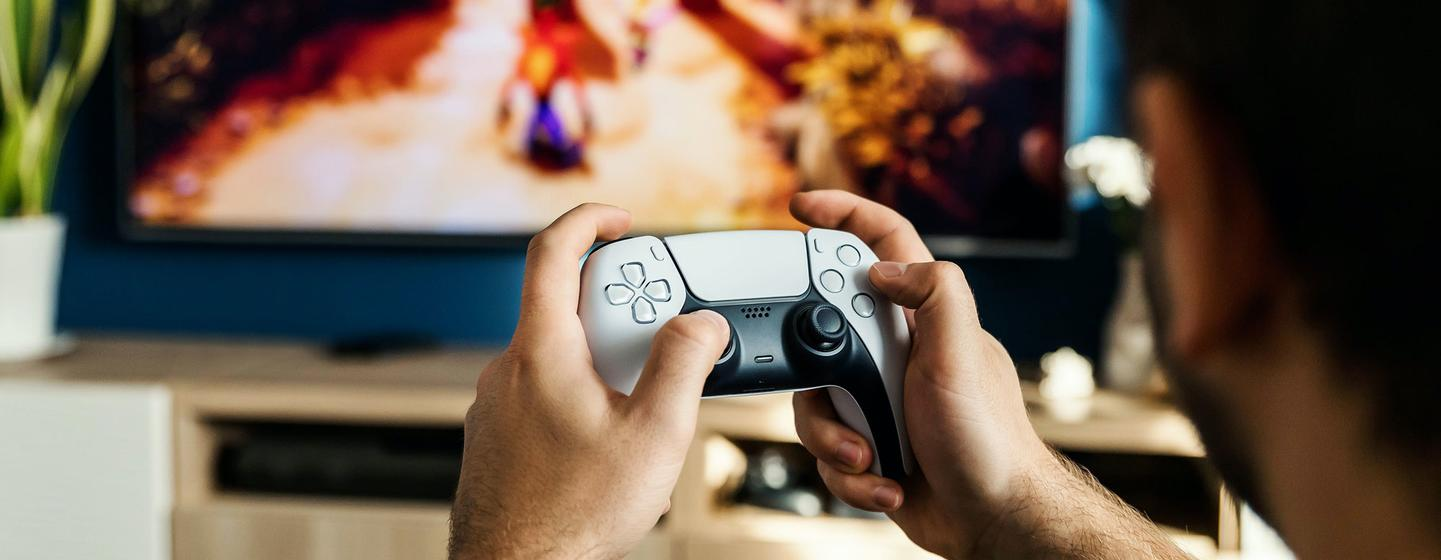

In this project we will EDA on "Video_games_esrb_rating" dataset on keggle and "Video_Games_Sales_as_at_22_Dec_2016" dataset. First we will perform the data cleaning and visualizations. Then we will perform the feature engineering tasks. Finally, we use the two data sets to model the global video game sales. 

For the modeling task we use xgboost. 

Links to the kaggle datasets:

https://www.kaggle.com/datasets/imohtn/video-games-rating-by-esrb

https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

In [1]:
#Import the numpy and pandas for analysis
import numpy as np
import pandas as pd

## EDA on game ratings dataset

It seems like the game ratings dataset has categorical features. These features are already in one hot encoded format. There is nothing much to do here. However, we will check for missing and duplicated values.

### Read and describe the dataset

In [2]:
# Read the 'Video_games_esrb_rating.csv' dataset
game_ratings = pd.read_csv('Video_games_esrb_rating.csv')
game_ratings

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,SENRAN KAGURA Peach Beach Splash,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,0,0,0,0,M
1891,Sneaky Bears,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
1892,SPARC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [3]:
# We need the number of rows and columns of the dataset
game_ratings.shape

(1895, 34)

To get a better underestanding of the dataset lets describe each numerical column. 

In [4]:
game_ratings.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,...,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,0.118206,...,0.013193,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852
std,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,0.322937,...,0.114129,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Since most of the columns have mean values that are near zero, we infer that the feature columns has more zeros than ones. This is because of the one hot encoded nature of these fetures. Also, we see that the maximum value for each feture is 1. Therefore, we conclude that there are no data entry erors such as some data has higher values than 1 etc.

In [5]:
game_ratings.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_janguage              int64
strong_sexual_conten

Only the title and esrb rating columnshas the object type data. How many unique entries does esrb rating column has?

In [6]:
game_ratings['esrb_rating'].unique()

array(['E', 'ET', 'M', 'T'], dtype=object)

### Missing and duplicated values

First we look for missing values

In [7]:
game_ratings.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

We did not find any missing values in the dataset

Now we explore the duplicated values

In [8]:
duplicates = game_ratings.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1890    False
1891    False
1892    False
1893    False
1894    False
Length: 1895, dtype: bool


There are no duplicated values

### Feature engineering

The dataset contains a column called console. This feature is not as relevent as the other features. This is because we do not put much weight to the specific platform in our analysis. Also, the game sales dataset already contains the console feature. If we used it twice then it would count to the duplication. 

Therefore, we will drop the console column here

In [9]:
game_ratings = game_ratings.drop(['console'], axis=1)

In [10]:
game_ratings.shape

(1895, 33)

Earlier we saw there are 34 columns now after we perform the drop we only see 33 columns. 

## EDA on game sales dataset

In this chapter we will import the  "Video_Games_Sales_as_at_22_Dec_2016" dataset. First we will analyse the dataset. Then we will perform our usual dupicted data and missing data search. Finally, we will perform feature engineering as we need to obtain the global game sales for later analysis.

### Read and describe the dataset

In [11]:
game_sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
game_sales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(game_sales.shape)
game_sales.describe()

(16719, 16)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [13]:
game_sales.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

### Missing values

We see that most of the features has lost of missing values. How do we underestand these missing values. Are they random or there is a specific pattern to the missing data such as older games has lots of missing data becuse recode keeping difficulties. We shall explore that in this section.

First let us obtain the number of missing values per column

In [14]:
game_sales.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

The total number of data samples is arround 16K and we see that columns through critic score to rating have nearly half of the data missing. Let us first analyse the missing data on these columns.

In [15]:
import missingno as msno
import matplotlib.pyplot as plt

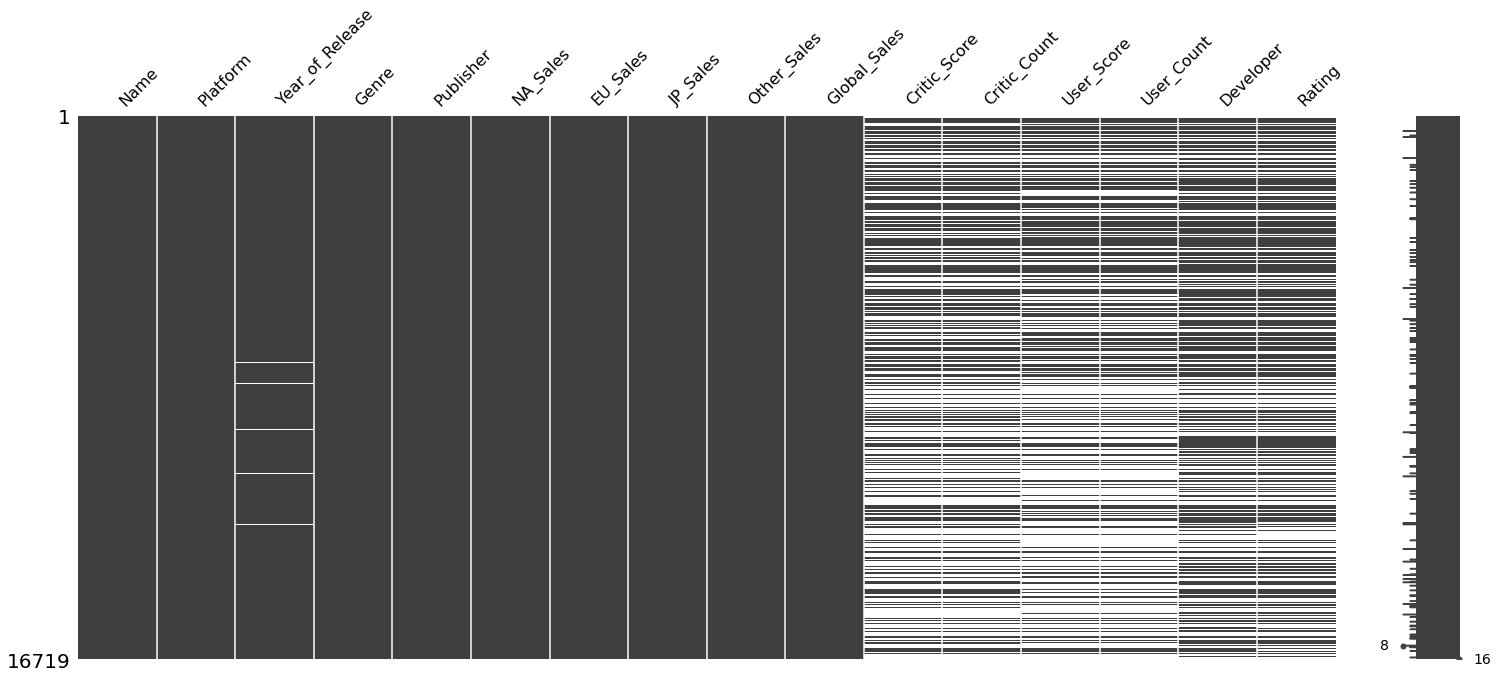

In [16]:
msno.matrix(game_sales)
plt.show()

In [17]:
features_with_missing_val = ['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']

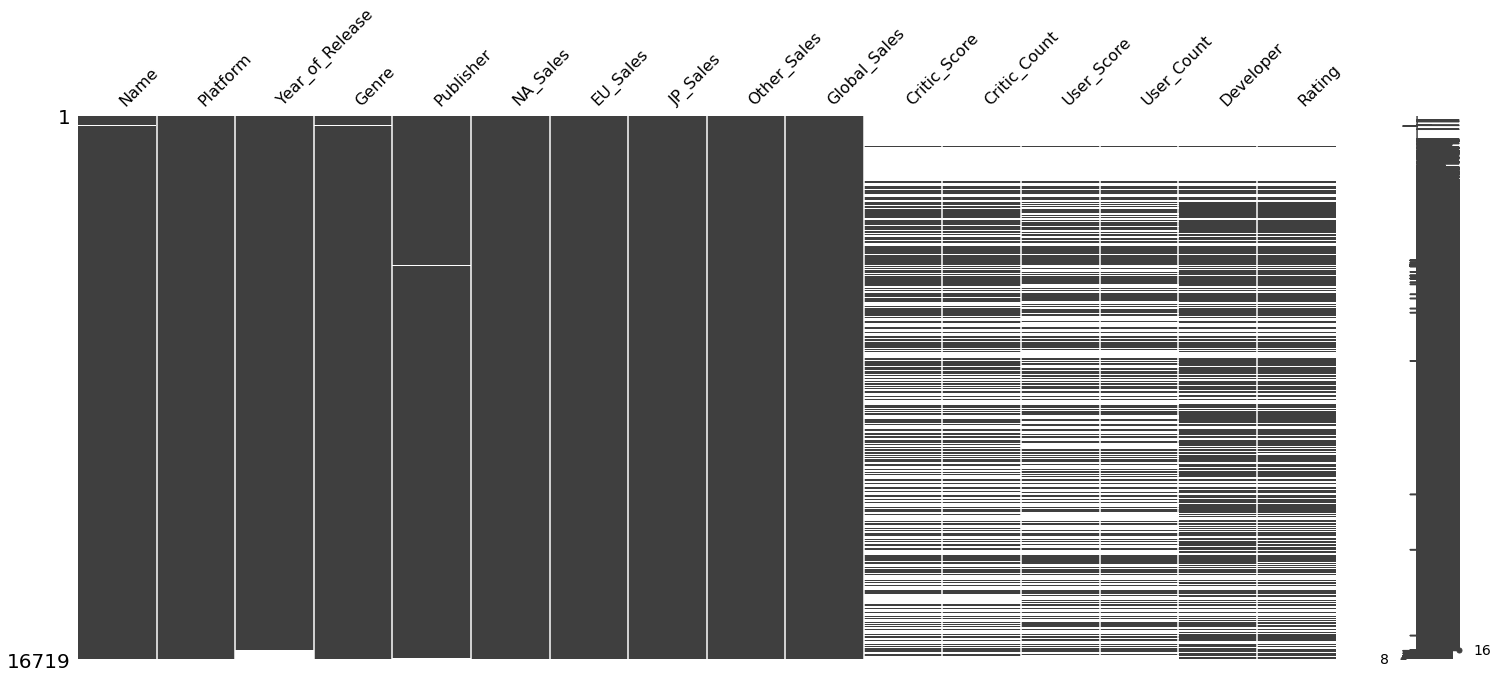

In [18]:
sorted_by_release_year = game_sales.sort_values('Year_of_Release')
msno.matrix(sorted_by_release_year)
plt.show()

From the msno matrix we see that most of the features that have missing values occur at early years. The reason for this could be lack of means to record the data. As gaming developed as an industry the record keeping must have evolved too. Also, we further observe there are large number of missing data that occurs randomly. By considering all these information we decided to replace the missing values by statistical mean of each feature.

Also, we decided to drop the rows that have missing release year and name. 

In [19]:
game_sales = game_sales.dropna(subset = ['Year_of_Release'])
game_sales = game_sales.dropna(subset = ['Name'])

In [20]:
columns_list = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
        'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']
for feature in columns_list:
    if game_sales[feature].dtypes == 'float64':
        game_sales[feature] = game_sales[feature].fillna(game_sales[feature].mean())

The publisher column has reletively small number of missing data. We are dropping those missing values as well

In [21]:
game_sales = game_sales.dropna(subset = ['Publisher'])

For our analysis both developer and ratings columns provide little input. We plan to join the game_ratings database with game_sales database at a later stage. Therefore, we shall drop the ratings column altoghether. 

In [22]:
game_sales = game_sales.drop([ 'Developer', 'Rating'], axis=1)

Now we shall check onece again for the missing values in the dataset. We can make sure there are no null values present anymore

In [23]:
game_sales.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
dtype: int64

As we expected we now have a clean dataset for further analysis

### Duplicated values

In this section we will explore whether there are any duplicated values are present in the data set.

In [24]:
duplicates = game_sales.duplicated()
duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
16714    False
16715    False
16716    False
16717    False
16718    False
Length: 16416, dtype: bool

Looks like there are no duplicated values in the dataset.

### Cross field validation

In the dataset the sales from different regions are given. Using this data we can cross check whether the sales from these regions add toghether correctly to produce the given global sales. If the fields does not add together then there is an inconsistancy in data recording. We can drop those entries as well.

In [25]:
sum_sales = game_sales[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
sales_cross_validation = sum_sales == game_sales['Global_Sales']
# Find and filter out rows with inconsistent sales totals
inconsistent_sales = game_sales[~sales_cross_validation]
consistant_sales = game_sales[sales_cross_validation]

In [26]:
inconsistent_sales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.00000,322.000000
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.30000,709.000000
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.994363,26.441313,7.12633,163.015141
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,68.994363,26.441313,7.12633,163.015141
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.60000,129.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16238,Vanark,PS,1999.0,Shooter,Jaleco,0.01,0.01,0.00,0.00,0.01,68.994363,26.441313,7.12633,163.015141
16256,Bratz: Forever Diamondz,PS2,2006.0,Adventure,THQ,0.01,0.01,0.00,0.00,0.01,68.994363,26.441313,7.12633,163.015141
16292,K-1 Grand Prix,PS,1999.0,Fighting,Jaleco,0.01,0.01,0.00,0.00,0.01,68.994363,26.441313,7.12633,163.015141
16680,G1 Jockey 4 2008,PS3,2008.0,Sports,Tecmo Koei,0.00,0.00,0.00,0.00,0.01,68.994363,26.441313,7.12633,163.015141


From the above table we observe there are 4945 entries that do not equate to the global sales.

### Sales by region 

In this analysis we are focusing on how did the sales change with each year

In [27]:
release_years = game_sales.sort_values('Year_of_Release')
release_years = release_years['Year_of_Release'].unique()

In [28]:
total_sales_consistant = consistant_sales.groupby('Year_of_Release')['Global_Sales'].sum()
total_sales = game_sales.groupby('Year_of_Release')['Global_Sales'].sum()

In [29]:
release_years_cons = consistant_sales.sort_values('Year_of_Release')
release_years_cons = release_years_cons['Year_of_Release'].unique()

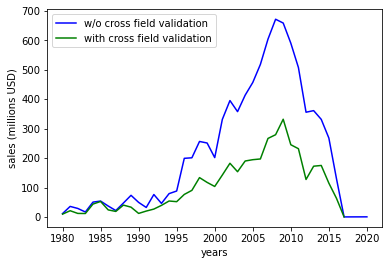

In [30]:
fig, ax = plt.subplots()
ax.plot(release_years, total_sales, color='b', label='w/o cross field validation')
ax.plot(release_years_cons, total_sales_consistant, color='g', label='with cross field validation')
ax.set_xlabel('years')
ax.set_ylabel('sales (millions USD)')
ax.legend()

The blue graph shows the total sales variation by year. The green graph shows the corrected data for cross field validation. Both graphs shows similar variation, but there values are different. 

By only considering the data that passed the cross field validation test, we can visualize the variation of sales in each region.

In [31]:
sales_in_NA = consistant_sales.groupby('Year_of_Release')['NA_Sales'].sum()
sales_in_EU = consistant_sales.groupby('Year_of_Release')['EU_Sales'].sum()
sales_in_JP = consistant_sales.groupby('Year_of_Release')['JP_Sales'].sum()
sales_in_other = consistant_sales.groupby('Year_of_Release')['Other_Sales'].sum()

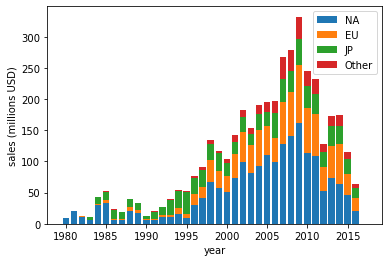

In [32]:
fig, ax = plt.subplots()
ax.bar(release_years_cons, sales_in_NA, label='NA')
ax.bar(release_years_cons, sales_in_EU, bottom=sales_in_NA, label='EU')
ax.bar(release_years_cons, sales_in_JP, bottom=sales_in_NA + sales_in_EU, label='JP')
ax.bar(release_years_cons, sales_in_other, bottom=sales_in_NA + sales_in_EU + sales_in_JP, label='Other')
ax.set_xlabel('year')
ax.set_ylabel('sales (millions USD)')
ax.legend()

From the figure we infer that the largest sales are conducted in North American region. Also, the every region follows more or simillar trend excep Japan. Japan seems to have more or less simillar buying pattern. 

During 2007-2009 there is a relatively large increase in sales. Perhaps, this is due to the 2008 financial crisis. During this period the unemployment rate increased. More people might have bought video games to ease the economic hardship due to the economic conditions.

Japan as a single country amounts for reletively large number of sales.

In [33]:
consistant_sales['Publisher'].unique()

array(['Nintendo', 'Take-Two Interactive', 'Activision',
       'Sony Computer Entertainment', 'Microsoft Game Studios', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'Konami Digital Entertainment', 'Square Enix',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'Eidos Interactive', 'RedOctane', 'Capcom',
       'Sony Computer Entertainment Europe', 'Atari', 'Palcom',
       'Vivendi Games', 'Namco Bandai Games', 'Enix Corporation',
       'Virgin Interactive', '505 Games', 'THQ', 'LucasArts', 'Sega',
       'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Deep Silver', '989 Studios',
       'Parker Bros.', 'Maxis', 'Imagic', 'Valve Software', 'Mindscape',
       'Disney Interactive Studios', 'Midway Games',
       'Acclaim Entertainment', 'MTV Games', 'Banpresto',
       'Oxygen Interactive', 'Gotham Games', 'Westwood Studios', 'GungHo',
       'Crave Entertainment', 'Hudson Soft', 'Codemast

In [34]:
consistant_sales[consistant_sales['Publisher'] == 'Nintendo'].groupby('Year_of_Release')['Global_Sales'].sum()

Year_of_Release
1983.0     7.69
1984.0    38.88
1985.0    49.03
1986.0     7.91
1987.0    11.95
1988.0    30.86
1989.0    25.09
1990.0     1.15
1991.0    12.34
1992.0    11.59
1993.0    17.05
1994.0    18.01
1995.0     9.40
1996.0    12.13
1997.0    12.03
1998.0    32.34
1999.0    11.84
2000.0    21.14
2001.0    14.29
2002.0    20.91
2003.0    11.84
2004.0    38.17
2005.0    36.06
2006.0    38.58
2007.0    63.59
2008.0    25.75
2009.0    84.82
2010.0    17.42
2011.0     4.43
2012.0     9.49
2013.0    24.75
2014.0    36.06
2015.0    13.29
2016.0    10.15
Name: Global_Sales, dtype: float64

In [35]:
sales_fig_publisher = []
for publisher in consistant_sales['Publisher'].unique():
    slaes_fig = consistant_sales[consistant_sales['Publisher'] == publisher].groupby('Year_of_Release')['Global_Sales'].sum()
    sales_fig_publisher.append(slaes_fig)

## Joining the two datasets

Before we move on to further analysing either datasets we shall join them by their game name columns. By joining them we can further obtain insights about the gaming industry